# Lead Scoring Case Study

## Business Objective

1. To assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads.
2. Finding out Hot Leads.
3. The top three variables in your model which contribute most towards the probability of a lead getting converted.
4. The top 3 categorical/dummy variables in the model which should be focused the most on in order to increase the probability of lead conversion.
5. Statergy During 2 Months for aggressive Lead conversion.
6. Statergy of Lead Conversion with no phone calls when the target is achieved.

## 1. Data Import and Understanding

In [1]:
# Importing Package:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Scaling data
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

# PCA Model
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

# Test Train Split
from sklearn.model_selection import train_test_split

# Feature Scaling
from sklearn.preprocessing import StandardScaler

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Performance of the model
from sklearn import metrics

### Importing data

In [2]:
# Importing all datasets
lead = pd.read_csv("Leads.csv")
lead.head(5)

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit          ...           \
0                            0                   0.0          ...            
1                          674                   2.5          ...            
2                         1532                   2.0          ...            
3                          305                   1.0          ...            
4                         1428                   1.0          ...            

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
# Let's check the dimensions of the dataframe
lead.shape

(9240, 37)

In [4]:
# let's look at the statistical aspects of the dataframe
lead.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
# Let's see the type of each column
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## 2.Data Preparation

### 2.1.Missing Value Imputation

In [6]:
lead.isnull().sum()*100/len(lead.index)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
#Backup
lead1 = lead.copy()

In [8]:
lead1.isnull().sum()*100/len(lead1.index)

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [9]:
lead1.loc[lead1['Lead Source'].isnull(),'Lead Source'] = lead1['Lead Source'].mode()[0]

In [10]:
lead1.loc[lead1['TotalVisits'].isnull(),'TotalVisits'] =  lead1['TotalVisits'].median()

In [11]:
lead1.loc[lead1['Page Views Per Visit'].isnull(),'Page Views Per Visit'] =  lead1['Page Views Per Visit'].median()

In [12]:
lead1.loc[lead1['Last Activity'].isnull(),'Last Activity'] = lead1['Last Activity'].mode()[0]

In [13]:
lead1.loc[lead1['Country'].isnull(),'Country'] = lead1['Country'].mode()[0]
lead1.loc[lead1['Country']=='unknown','Country'] = lead1['Country'].mode()[0]

In [14]:
lead1.loc[lead1['Specialization']=='Select','What is your current occupation'].value_counts()

Unemployed              1828
Student                   72
Working Professional      27
Other                      1
Businessman                1
Name: What is your current occupation, dtype: int64

In [15]:
lead1.loc[lead1['Specialization'].isnull(),'What is your current occupation'].value_counts()

Student                 13
Working Professional     4
Businessman              1
Name: What is your current occupation, dtype: int64

In [16]:
# Most of the Select from Specialization coming from unemployed. Allocating null specialisation in Select itself.
lead1.loc[lead1['Specialization'].isnull(),'Specialization'] = lead1['Specialization'].mode()[0]

In [17]:
lead1.loc[lead1['How did you hear about X Education'].isnull(),'How did you hear about X Education'] = lead1['How did you hear about X Education'].mode()[0]

In [18]:
lead1.loc[lead1['What is your current occupation'].isnull(),'What is your current occupation'] = lead1['What is your current occupation'].mode()[0]

In [19]:
lead1.loc[lead1['What matters most to you in choosing a course'].isnull(),'What matters most to you in choosing a course'] = lead1['What matters most to you in choosing a course'].mode()[0]

In [20]:
lead1.loc[((lead1['Converted']==1) & lead1['Tags'].isnull()),'Tags'] = 'Will revert after reading the email'
lead1.loc[((lead1['Converted']==0) & lead1['Tags'].isnull()),'Tags'] = 'Ringing'

In [21]:
lead1.loc[((lead1['Converted']==1) & lead1['Lead Quality'].isnull()),'Lead Quality'] = 'High in Relevance'
lead1.loc[((lead1['Converted']==0) & lead1['Lead Quality'].isnull()),'Lead Quality'] = 'Worst'

In [22]:
lead1.drop(['Lead Profile','City','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1,inplace=True)

In [23]:
lead1['I agree to pay the amount through cheque'].value_counts()

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [24]:
# Dropping Feature with only one category
lead1.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

In [25]:
lead1['Get updates on DM Content'].value_counts()

No    9240
Name: Get updates on DM Content, dtype: int64

In [26]:
# Dropping Feature with only one category
lead1.drop('Get updates on DM Content',axis=1,inplace=True)

In [27]:
lead1['Update me on Supply Chain Content'].value_counts()

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [28]:
# Dropping Feature with only one category
lead1.drop('Update me on Supply Chain Content',axis=1,inplace=True)

In [29]:
lead1['Receive More Updates About Our Courses'].value_counts()

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [30]:
# Dropping Feature with only one category
lead1.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

In [31]:
lead1['Through Recommendations'].value_counts()

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [32]:
# Dropping feature highly skewed Yes/No
lead1.drop('Through Recommendations',axis=1,inplace=True)

In [33]:
lead1['Digital Advertisement'].value_counts()

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [34]:
lead1['Newspaper'].value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [35]:
lead1['X Education Forums'].value_counts()

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [36]:
lead1['Newspaper Article'].value_counts()

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [37]:
lead1['Magazine'].value_counts()

No    9240
Name: Magazine, dtype: int64

In [38]:
lead1['Search'].value_counts()

No     9226
Yes      14
Name: Search, dtype: int64

In [39]:
# Dropping highly skewed variables
lead1.drop(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement'],axis=1,inplace=True)

In [40]:
lead1['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [41]:
lead1.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [42]:
lead1.isnull().sum()*100/len(lead1.index)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
Specialization                            0.0
How did you hear about X Education        0.0
What is your current occupation           0.0
Tags                                      0.0
Lead Quality                              0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

### 2.2. Dummy values for categorical variable

In [43]:
# Backup
lead2 = lead1.copy()

In [44]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Call','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
lead2[varlist] = lead2[varlist].apply(binary_map)

In [45]:
lead2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 19 columns):
Prospect ID                               9240 non-null object
Lead Number                               9240 non-null int64
Lead Origin                               9240 non-null object
Lead Source                               9240 non-null object
Do Not Email                              9240 non-null int64
Do Not Call                               9240 non-null int64
Converted                                 9240 non-null int64
TotalVisits                               9240 non-null float64
Total Time Spent on Website               9240 non-null int64
Page Views Per Visit                      9240 non-null float64
Last Activity                             9240 non-null object
Country                                   9240 non-null object
Specialization                            9240 non-null object
How did you hear about X Education        9240 non-null object
What is your c

In [46]:
# Creating a dummy variable for the variable 'Lead Origin' and dropping the first one.
leado = pd.get_dummies(lead2['Lead Origin'],prefix='Lead Origin',drop_first=True)
#Adding the results to the master dataframe
lead2 = pd.concat([lead2,leado],axis=1)

# Creating a dummy variable for the variable 'Lead Source' and dropping the first one.
leads = pd.get_dummies(lead2['Lead Source'],prefix='Lead Source',drop_first=True)
#Adding the results to the master dataframe
lead2 = pd.concat([lead2,leads],axis=1)

# Creating a dummy variable for the variable 'Last Activity' and dropping the first one.
lasta = pd.get_dummies(lead2['Last Activity'],prefix='Last Activity',drop_first=True)
#Adding the results to the master dataframe
lead2 = pd.concat([lead2,lasta],axis=1)

# Creating a dummy variable for the variable 'Country' and dropping the first one.
leadc = pd.get_dummies(lead2['Country'],prefix='Country',drop_first=True)
#Adding the results to the master dataframe
lead2 = pd.concat([lead2,leadc],axis=1)

# Creating a dummy variable for the variable 'Specialization' and dropping the first one.
spec = pd.get_dummies(lead2['Specialization'],prefix='Specialization',drop_first=True)
#Adding the results to the master dataframe
lead2 = pd.concat([lead2,spec],axis=1)

# Creating a dummy variable for the variable 'How did you hear about X Education' and dropping the first one.
leadh = pd.get_dummies(lead2['How did you hear about X Education'],prefix='How_hear',drop_first=True)
#Adding the results to the master dataframe
lead2 = pd.concat([lead2,leadh],axis=1)

# Creating a dummy variable for the variable 'Occupation' and dropping the first one.
leado = pd.get_dummies(lead2['What is your current occupation'],prefix='Occupation',drop_first=True)
#Adding the results to the master dataframe
lead2 = pd.concat([lead2,leado],axis=1)

# Creating a dummy variable for the variable 'Tags' and dropping the first one.
leadt = pd.get_dummies(lead2['Tags'],prefix='Tags',drop_first=True)
#Adding the results to the master dataframe
lead2 = pd.concat([lead2,leadt],axis=1)

# Creating a dummy variable for the variable 'Lead Quality' and dropping the first one.
leadq = pd.get_dummies(lead2['Lead Quality'],prefix='Lead_Quality',drop_first=True)
#Adding the results to the master dataframe
lead2 = pd.concat([lead2,leadq],axis=1)

# Creating a dummy variable for the variable 'Last Notable Activity'. 
lastna = pd.get_dummies(lead2['Last Notable Activity'],prefix='Last Notable Activity',drop_first=True)
#Adding the results to the master dataframe
lead2 = pd.concat([lead2,lastna],axis=1)

In [47]:
lead2.drop(['Last Notable Activity','Lead Quality','Tags','What is your current occupation','How did you hear about X Education','Specialization','Country','Last Activity','Lead Source','Lead Origin'],axis=1,inplace=True)

In [48]:
lead2.dtypes

Prospect ID                                                object
Lead Number                                                 int64
Do Not Email                                                int64
Do Not Call                                                 int64
Converted                                                   int64
TotalVisits                                               float64
Total Time Spent on Website                                 int64
Page Views Per Visit                                      float64
A free copy of Mastering The Interview                      int64
Lead Origin_Landing Page Submission                         uint8
Lead Origin_Lead Add Form                                   uint8
Lead Origin_Lead Import                                     uint8
Lead Origin_Quick Add Form                                  uint8
Lead Source_Direct Traffic                                  uint8
Lead Source_Facebook                                        uint8
Lead Sourc

### 2.3.Outlier Detection and Imputation

In [49]:
lead2.describe()

Lead Number  Do Not Email  Do Not Call    Converted  TotalVisits  \
count    9240.000000   9240.000000  9240.000000  9240.000000  9240.000000   
mean   617188.435606      0.079437     0.000216     0.385390     3.438636   
std     23405.995698      0.270435     0.014711     0.486714     4.819024   
min    579533.000000      0.000000     0.000000     0.000000     0.000000   
25%    596484.500000      0.000000     0.000000     0.000000     1.000000   
50%    615479.000000      0.000000     0.000000     0.000000     3.000000   
75%    637387.250000      0.000000     0.000000     1.000000     5.000000   
max    660737.000000      1.000000     1.000000     1.000000   251.000000   

       Total Time Spent on Website  Page Views Per Visit  \
count                  9240.000000           9240.000000   
mean                    487.698268              2.357440   
std                     548.021466              2.145781   
min                       0.000000              0.000000   
25%                      12.000000              1.000000   
50%                     248.000000              2.000000   
75%                     936.000000              3.000000   
max                    2272.000000             55.000000   

       A free copy of Mastering The Interview  \
count                             9240.000000   
mean                                 0.312554   
std                                  0.463559   
min                                  0.000000   
25%                                  0.000000   
50%                                  0.000000   
75%                                  1.000000   
max                                  1.000000   

       Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
count                          9240.000000                9240.000000   
mean                              0.528788                   0.077706   
std                               0.499198                   0.267722   
min                               0.000000                   0.000000   
25%                               0.000000                   0.000000   
50%                               1.000000                   0.000000   
75%                               1.000000                   0.000000   
max                               1.000000                   1.000000   

                              ...                          \
count                         ...                           
mean                          ...                           
std                           ...                           
min                           ...                           
25%                           ...                           
50%                           ...                           
75%                           ...                           
max                           ...                           

       Last Notable Activity_Form Submitted on Website  \
count                                      9240.000000   
mean                                          0.000108   
std                                           0.010403   
min                                           0.000000   
25%                                           0.000000   
50%                                           0.000000   
75%                                           0.000000   
max                                           1.000000   

       Last Notable Activity_Had a Phone Conversation  \
count                                     9240.000000   
mean                                         0.001515   
std                                          0.038898   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       Last Notable Activity_Modified  \
count                     9240.000000   
mean 

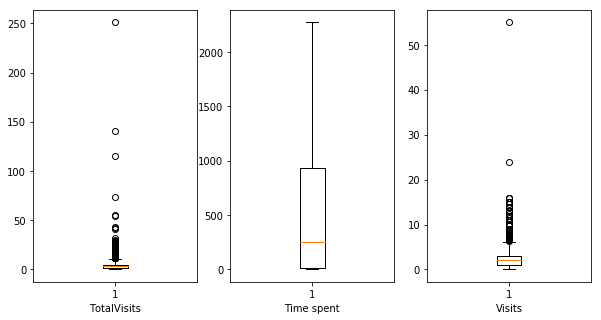

In [50]:
plt.figure(figsize=[10,5])

plt.subplot(1,3,1)
plt.boxplot(lead2.TotalVisits)
plt.xlabel('TotalVisits')

plt.subplot(1,3,2)
plt.boxplot(lead2['Total Time Spent on Website'])
plt.xlabel('Time spent')

plt.subplot(1,3,3)
plt.boxplot(lead2['Page Views Per Visit'])
plt.xlabel('Visits')

plt.show()

In [51]:
# For TotalVisits
lead2.loc[lead2['TotalVisits'] > lead2['TotalVisits'].quantile(0.75) + (lead2['TotalVisits'].quantile(0.75) - lead2['TotalVisits'].quantile(0.25))*1.5,'TotalVisits'] = lead2['TotalVisits'].quantile(0.75) + (lead2['TotalVisits'].quantile(0.75) - lead2['TotalVisits'].quantile(0.25))*1.5

In [52]:
# For Visits Pages
lead2.loc[lead2['Page Views Per Visit'] > lead2['Page Views Per Visit'].quantile(0.75) + (lead2['Page Views Per Visit'].quantile(0.75) - lead2['Page Views Per Visit'].quantile(0.25))*1.5,'Page Views Per Visit'] = lead2['Page Views Per Visit'].quantile(0.75) + (lead2['Page Views Per Visit'].quantile(0.75) - lead2['Page Views Per Visit'].quantile(0.25))*1.5

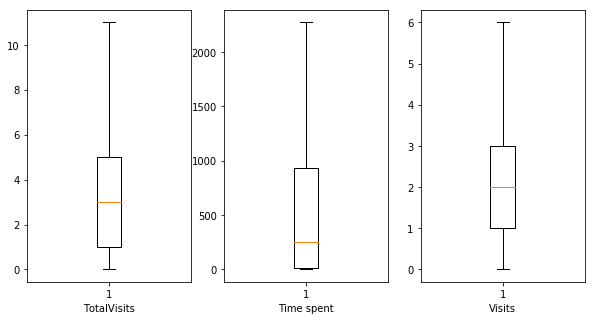

In [53]:
plt.figure(figsize=[10,5])

plt.subplot(1,3,1)
plt.boxplot(lead2.TotalVisits)
plt.xlabel('TotalVisits')

plt.subplot(1,3,2)
plt.boxplot(lead2['Total Time Spent on Website'])
plt.xlabel('Time spent')

plt.subplot(1,3,3)
plt.boxplot(lead2['Page Views Per Visit'])
plt.xlabel('Visits')

plt.show()

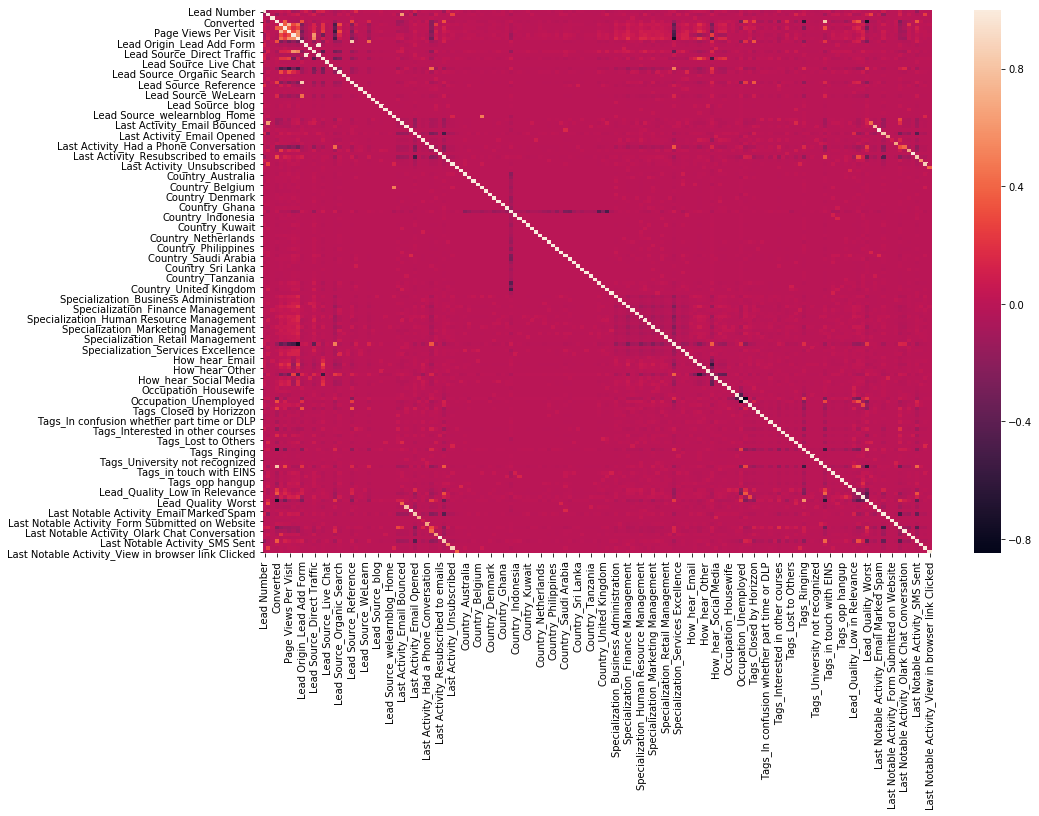

In [54]:
plt.figure(figsize=[15,10])
sns.heatmap(lead2.corr(),annot = False)

### 2.4.Train Test Split

In [55]:
lead_train,lead_test = train_test_split(lead2,train_size=0.7,test_size=0.3,random_state=150)

In [56]:
lead_train_X = lead_train.drop(['Converted','Prospect ID','Lead Number'],axis=1)
lead_train_y = lead_train['Converted']
lead_test_X = lead_test.drop(['Converted','Prospect ID','Lead Number'],axis=1)
lead_test_y = lead_test['Converted']

### 2.5. Feature Scaling

In [57]:
lead_train_X.dtypes

Do Not Email                                                int64
Do Not Call                                                 int64
TotalVisits                                               float64
Total Time Spent on Website                                 int64
Page Views Per Visit                                      float64
A free copy of Mastering The Interview                      int64
Lead Origin_Landing Page Submission                         uint8
Lead Origin_Lead Add Form                                   uint8
Lead Origin_Lead Import                                     uint8
Lead Origin_Quick Add Form                                  uint8
Lead Source_Direct Traffic                                  uint8
Lead Source_Facebook                                        uint8
Lead Source_Google                                          uint8
Lead Source_Live Chat                                       uint8
Lead Source_NC_EDM                                          uint8
Lead Sourc

In [58]:
# Scaling numerical values
scaler = StandardScaler()
lead_train_X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(lead_train_X[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [59]:
lead_train_y.value_counts()*100/len(lead_train_y.index)

0    61.842919
1    38.157081
Name: Converted, dtype: float64

## 3.Model Building

First Model with all the variables

In [60]:
import statsmodels.api as sm
lead_train_X1 = sm.add_constant(lead_train_X)
logm1 = sm.GLM(lead_train_y,lead_train_X1, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:879: RuntimeWarning: invalid value encountered in true_divide
  endog_mu = self._clean(endog / mu)
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:880: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/families/family.py:932: RuntimeWarning: divide by zero encountered in true_divide
  special.gammaln(n - y + 1) + y * np.log(mu / (1 - mu)) +
/anaconda3/lib/python3.6/site-packages/statsmodels/genmod/famil

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                          151
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sun, 03 Mar 2019   Deviance:                          nan
Time:                        22:53:23   Pearson chi2:                 6.35e+17
No. Iterations:                   100   Covariance Type:             nonrobust
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                   1.045e+16   1.13e+08   9.24e+07      0.000    1.04e+16    1.04e+16
Do Not Email                                           -1.205e+14   4.52e+06  -2.66e+07      0.000    -1.2e+14    -1.2e+14
Do Not Call                                             5.972e+15   6.78e+07   8.81e+07      0.000    5.97e+15    5.97e+15
TotalVisits                                             6.482e+13   1.42e+06   4.55e+07      0.000    6.48e+13    6.48e+13
Total Time Spent on Website                             1.376e+14   1.04e+06   1.33e+08      0.000    1.38e+14    1.38e+14
Page Views Per Visit                                   -8.029e+13   1.56e+06  -5.15e+07      0.000   -8.03e+13   -8.03e+13
A free copy of Mastering The Interview                   6.99e+13    3.3e+06   2.12e+07      0.000    6.99e+13    6.99e+13
Lead Origin_Landing Page Submission                    -5.093e+13   3.99e+06  -1.28e+07      0.000   -5.09e+13   -5.09e+13
Lead Origin_Lead Add Form                              -5.835e+13   1.31e+07  -4.47e+06      0.000   -5.83e+13   -5.83e+13
Lead Origin_Lead Import                                 3.679e+15   4.98e+07   7.39e+07      0.000    3.68e+15    3.68e+15
Lead Origin_Quick Add Form                              3.767e+14   6.86e+07   5.49e+06      0.000    3.77e+14    3.77e+14
Lead Source_Direct Traffic                             -5.378e+15   4.11e+07  -1.31e+08      0.000   -5.38e+15   -5.38e+15
Lead Source_Facebook                                   -8.965e+15   6.45e+07  -1.39e+08      0.000   -8.97e+15   -8.97e+15
Lead Source_Google                                     -5.413e+15    4.1e+07  -1.32e+08      0.000   -5.41e+15   -5.41e+15
Lead Source_Live Chat                                   6.402e+15   7.77e+07   8.24e+07      0.000     6.4e+15     6.4e+15
Lead Source_NC_EDM                                       -60.2691    2.2e-06  -2.74e+07      0.000     -60.269     -60.269
Lead Source_Olark Chat                                 -5.204e+15   4.12e+07  -1.26e+08      0.000    -5.2e+15    -5.2e+15
Lead Source_Organic Search                             -5.279e+15   4.11e+07  -1.28e+08      0.000   -5.28e+15   -5.28e+15
Lead Source_Pay per Click Ads                            -6.8e+15   7.88e+07  -8.63e+07      0.000    -6.8e+15    -6.8e+15
Lead Source_Press_Release                              -6.315e+15   7.92e+07  -7.97e+07      0.000   -6.31e+15   -6.31e+15
Lead Source_Reference                                  -5.347e+15   3.91e+07  -1.37e+08      0.000   -5.35e+15   -5.35e+15
Lead Source_Referral Sites                              -5.46e+15   4.17e+07  -1.31e+08      0.000   -5.46e+15   -5.46e+15
Lead Source_Social Media                               -9.507e+14   7.89e+07  -1.21e+07

### 3.1 Feature Selection using RFE

In [61]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [62]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(lead_train_X, lead_train_y)

In [63]:
list(zip(lead_train_X.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 17),
 ('Do Not Call', False, 65),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 79),
 ('Lead Origin_Landing Page Submission', False, 67),
 ('Lead Origin_Lead Add Form', False, 9),
 ('Lead Origin_Lead Import', False, 53),
 ('Lead Origin_Quick Add Form', False, 113),
 ('Lead Source_Direct Traffic', False, 45),
 ('Lead Source_Facebook', False, 63),
 ('Lead Source_Google', False, 47),
 ('Lead Source_Live Chat', False, 95),
 ('Lead Source_NC_EDM', False, 140),
 ('Lead Source_Olark Chat', False, 8),
 ('Lead Source_Organic Search', False, 48),
 ('Lead Source_Pay per Click Ads', False, 129),
 ('Lead Source_Press_Release', False, 120),
 ('Lead Source_Reference', False, 86),
 ('Lead Source_Referral Sites', False, 46),
 ('Lead Source_Social Media', False, 72),
 ('Lead Source_WeLearn', False, 105),
 ('Lead Source_Welingak Website', False, 15),
 ('Lead Source_

In [64]:
# Selected columns
col = lead_train_X.columns[rfe.support_]
col

Index(['Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Interested in Next batch',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given',
       'Lead_Quality_Low in Relevance', 'Lead_Quality_Might be',
       'Lead_Quality_Not Sure', 'Lead_Quality_Worst'],
      dtype='object')

Second model with 15 variables:

In [65]:
lead_train_X2 = sm.add_constant(lead_train_X[col])
logm2 = sm.GLM(lead_train_y,lead_train_X2, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -454.05
Date:                Sun, 03 Mar 2019   Deviance:                       908.10
Time:                        22:53:28   Pearson chi2:                 6.94e+03
No. Iterations:                    23   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.5619      0.340     -1.653      0.098      -1.228       0.104
Last Activity_Had a Phone Conversation      -2.1872      0.660     -3.312      0.001      -3.481      -0.893
Last Activity_SMS Sent                       1.4033      0.213      6.602      0.000       0.987       1.820
Tags_Busy                                    2.3478      0.298      7.887      0.000       1.764       2.931
Tags_Closed by Horizzon                      7.6461      1.042      7.338      0.000       5.604       9.688
Tags_Interested in Next batch               26.1380   7.53e+04      0.000      1.000   -1.48e+05    1.48e+05
Tags_Lost to EINS                            7.9577      0.867      9.179      0.000       6.259       9.657
Tags_Ringing                                -1.1996      0.320     -3.747      0.000      -1.827      -0.572
Tags_Will revert after reading the email     5.9989      0.297     20.177      0.000       5.416       6.582
Tags_invalid number                        -21.3765   1.42e+04     -0.002      0.999   -2.78e+04    2.78e+04
Tags_switched off                           -1.6720      0.632     -2.644      0.008      -2.912      -0.432
Tags_wrong number given                    -22.2816   1.97e+04     -0.001      0.999   -3.87e+04    3.87e+04
Lead_Quality_Low in Relevance               -2.1895      0.438     -4.997      0.000      -3.048      -1.331
Lead_Quality_Might be                       -2.7702      0.393     -7.052      0.000      -3.540      -2.000
Lead_Quality_Not Sure                       -2.0156      0.381     -5.287      0.000      -2.763      -1.268
Lead_Quality_Worst                          -6.6513      0.676     -9.843      0.000      -7.976      -5.327
============================================================================================================
"""

In [66]:
# Dropping variable with high p value:
col = col.drop(['Tags_wrong number given','Tags_invalid number','Tags_Interested in Next batch'])

Third Model with 12 features:

In [67]:
lead_train_X3 = sm.add_constant(lead_train_X[col])
logm3 = sm.GLM(lead_train_y,lead_train_X3, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -465.81
Date:                Sun, 03 Mar 2019   Deviance:                       931.63
Time:                        22:53:28   Pearson chi2:                 6.89e+03
No. Iterations:                    10   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.6650      0.331     -2.009      0.044      -1.314      -0.016
Last Activity_Had a Phone Conversation      -2.1624      0.659     -3.283      0.001      -3.453      -0.872
Last Activity_SMS Sent                       1.4047      0.206      6.813      0.000       1.001       1.809
Tags_Busy                                    2.5269      0.288      8.773      0.000       1.962       3.092
Tags_Closed by Horizzon                      7.6799      1.040      7.381      0.000       5.641       9.719
Tags_Lost to EINS                            8.0537      0.864      9.317      0.000       6.359       9.748
Tags_Ringing                                -1.0295      0.309     -3.337      0.001      -1.634      -0.425
Tags_Will revert after reading the email     6.0394      0.287     21.045      0.000       5.477       6.602
Tags_switched off                           -1.5027      0.626     -2.399      0.016      -2.730      -0.275
Lead_Quality_Low in Relevance               -2.0251      0.426     -4.749      0.000      -2.861      -1.189
Lead_Quality_Might be                       -2.7295      0.383     -7.135      0.000      -3.479      -1.980
Lead_Quality_Not Sure                       -2.1187      0.372     -5.702      0.000      -2.847      -1.390
Lead_Quality_Worst                          -6.6465      0.668     -9.956      0.000      -7.955      -5.338
============================================================================================================
"""

All the variables are significant, so testing prediction on train data:

In [68]:
y_train_pred = res.predict(lead_train_X3).values.reshape(-1)
y_train_pred

array([2.38468462e-04, 9.82869401e-01, 1.35667581e-02, ...,
       9.99848288e-01, 2.38468462e-04, 4.36142549e-01])

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = lead_train_X[col].columns
vif['VIF'] = [variance_inflation_factor(lead_train_X[col].values, i) for i in range(lead_train_X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                                  Tags_Busy  1.19
7                          Tags_switched off  1.14
3                    Tags_Closed by Horizzon  1.04
4                          Tags_Lost to EINS  1.02
0     Last Activity_Had a Phone Conversation  1.01
8              Lead_Quality_Low in Relevance  0.44
11                        Lead_Quality_Worst  0.23
6   Tags_Will revert after reading the email  0.22
1                     Last Activity_SMS Sent  0.12
9                      Lead_Quality_Might be  0.06
5                               Tags_Ringing  0.04
10                     Lead_Quality_Not Sure  0.03

Multicolinearity is very low.

In [70]:
# Dropping features as missing value imputation might impact the model
col = col.drop(['Lead_Quality_Worst','Tags_Will revert after reading the email','Tags_Ringing'])

Forth Model with 9 features.

In [71]:
lead_train_X4 = sm.add_constant(lead_train_X[col])
logm4 = sm.GLM(lead_train_y,lead_train_X4, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6458
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2858.9
Date:                Sun, 03 Mar 2019   Deviance:                       5717.8
Time:                        22:53:28   Pearson chi2:                 8.83e+03
No. Iterations:                     8   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -1.7813      0.048    -36.786      0.000      -1.876      -1.686
Last Activity_Had a Phone Conversation     1.2083      0.581      2.078      0.038       0.069       2.348
Last Activity_SMS Sent                     1.8592      0.071     26.217      0.000       1.720       1.998
Tags_Busy                                  1.2869      0.221      5.835      0.000       0.855       1.719
Tags_Closed by Horizzon                    6.8695      1.004      6.843      0.000       4.902       8.837
Tags_Lost to EINS                          5.2422      0.589      8.899      0.000       4.088       6.397
Tags_switched off                         -4.2706      0.603     -7.082      0.000      -5.452      -3.089
Lead_Quality_Low in Relevance              2.9886      0.141     21.170      0.000       2.712       3.265
Lead_Quality_Might be                      1.9247      0.091     21.156      0.000       1.746       2.103
Lead_Quality_Not Sure                     -0.4688      0.114     -4.118      0.000      -0.692      -0.246
==========================================================================================================
"""

In [72]:
y_train_pred = res.predict(lead_train_X4).values.reshape(-1)
y_train_pred

array([0.14413677, 0.88106654, 0.00147047, ..., 0.99513141, 0.14413677,
       0.27623851])

In [73]:
y_pred = pd.DataFrame()
y_pred['Converted'] = lead_train_y
y_pred['pred1'] = y_train_pred
y_pred['predicted'] = y_pred.pred1.map(lambda x: 1 if x > 0.5 else 0)

In [74]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_pred.Converted, y_pred.predicted))

0.8079777365491652


In [75]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_pred.Converted, y_pred.predicted)
print(confusion)

[[3305  695]
 [ 547 1921]]


In [76]:
metrics.f1_score(y_pred.Converted, y_pred.predicted)

0.7557041699449253

In [77]:
metrics.recall_score(y_pred.Converted, y_pred.predicted)

0.7783630470016207

In [78]:
metrics.precision_score(y_pred.Converted, y_pred.predicted)

0.7343272171253823

In [79]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred[i]= y_pred.pred1.map(lambda x: 1 if x > i else 0)
y_pred.head()

Converted     pred1  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
7668          0  0.144137          0    1    1    0    0    0    0    0    0   
3524          1  0.881067          1    1    1    1    1    1    1    1    1   
144           0  0.001470          0    1    0    0    0    0    0    0    0   
7567          0  0.144137          0    1    1    0    0    0    0    0    0   
8854          1  0.535779          1    1    1    1    1    1    1    0    0   

      0.8  0.9  
7668    0    0  
3524    1    0  
144     0    0  
7567    0    0  
8854    0    0

In [80]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_pred.Converted, y_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi    speci
0.0   0.0  0.381571  1.000000  0.00000
0.1   0.1  0.451144  0.988655  0.11950
0.2   0.2  0.797001  0.825365  0.77950
0.3   0.3  0.796073  0.815235  0.78425
0.4   0.4  0.797001  0.813614  0.78675
0.5   0.5  0.807978  0.778363  0.82625
0.6   0.6  0.778912  0.498379  0.95200
0.7   0.7  0.778912  0.498379  0.95200
0.8   0.8  0.745826  0.377634  0.97300
0.9   0.9  0.679499  0.168152  0.99500


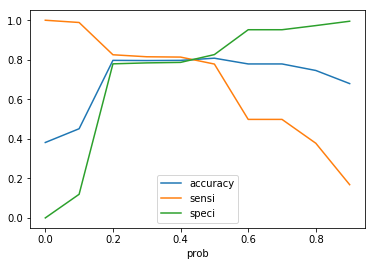

In [81]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As per the above sensitivity specificity tradeoff, probability of 0.4 as thrashold can give optimum result.

### 3.2. Applying model to test data

In [82]:
lead_test_X1 = sm.add_constant(lead_test_X[col])

In [83]:
lead_test_pred = pd.DataFrame()
lead_test_pred['Converted'] = lead_test_y
lead_test_pred

Converted
5521          0
3581          0
7696          1
7038          0
5116          1
8750          1
2883          0
4168          1
3105          0
8615          0
3480          0
7398          0
5476          0
130           1
4915          0
21            0
5504          0
8583          1
6782          0
503           0
6407          0
6120          1
5561          1
8561          0
263           0
3821          0
5806          1
3040          0
4681          1
7062          0
...         ...
234           0
5743          0
3677          1
2553          0
8059          1
8969          0
1938          0
4823          0
3855          1
8166          0
8875          0
8256          0
5392          0
4904          0
3295          0
4023          1
1372          0
364           1
945           0
1686          0
2455          0
3160          0
8888          1
7678          0
4891          1
8118          1
8702          0
5739          0
5965          1
8551          1

[2772 rows x 1 columns]

In [84]:
y_test_p = res.predict(lead_test_X1).values.reshape(-1)
y_test_p

array([0.14413677, 0.14413677, 0.51945528, ..., 0.7698119 , 0.14413677,
       0.7698119 ])

In [85]:
lead_test_pred['pred1'] = y_test_p

In [86]:
lead_test_pred['prediction'] = lead_test_pred.pred1.map(lambda x: 1 if x > 0.4 else 0)

In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(lead_test_pred.Converted, lead_test_pred.prediction))

0.7918470418470418


In [88]:
# Confusion matrix 
confusion = metrics.confusion_matrix(lead_test_pred.Converted, lead_test_pred.prediction)
print(confusion)

[[1316  363]
 [ 214  879]]


In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

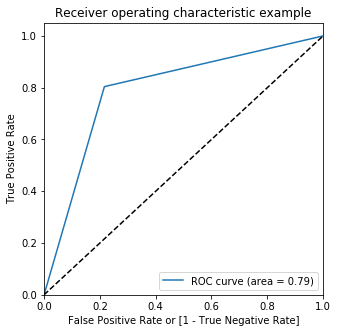

In [90]:
draw_roc(lead_test_pred.Converted, lead_test_pred.prediction)

## 4.Creating Lead score

In [91]:
lead_score = sm.add_constant(lead2[col])

In [92]:
lead_score_p = res.predict(lead_score).values.reshape(-1)
lead_score_p

array([0.7698119 , 0.14413677, 0.53577888, ..., 0.40350023, 0.51945528,
       0.88106654])

In [93]:
lead_score_df = pd.DataFrame()
lead_score_df['lead_score'] = lead_score_p
lead_score_df['lead_score'] = lead_score_df['lead_score']*100
lead_score_df.head()

lead_score
0   76.981190
1   14.413677
2   53.577888
3    9.533996
4   53.577888

In [94]:
lead_score_data = pd.concat([lead1,lead_score_df],axis=1)

#### Extracting data as per lead score > 40: (as the Treshold probability is 0.4 for 80% accuracy):

In [95]:
action_data = lead_score_data.loc[lead_score_data['lead_score']>40,:]

In [96]:
action_data['Converted'].value_counts()/len(action_data.index)

1    0.703631
0    0.296369
Name: Converted, dtype: float64

In [97]:
action_data['Converted'].value_counts()[1]/lead_score_data['Converted'].value_counts()[1]

0.8107273237854535

1. More than 70% in action data is Converted.
2. 81% of overall Converted leads are covered in Hot Leads.

### Results, Recommendations have been provided in the PPT